## Analysis on acute lower respiratory infections

Team: Runtime Terrors

Members:    
> Vinu Prasad Bhambore (vpb2)

> Srijith Srinath (ssrina2)

> Dhruman Jayesh Shah (djshah5)

##### Notebook Update 9 - 04/17/2020

Name of the dataset: PAHO Regional Mortality Dataset
    
Background: The PAHO Regional Mortality Database is an integrated database consisting of national datasets from Member States and is updated annually. The dataset includes data from 48 countries and territories.  The source of the national datasets varies by country. For some countries the national institution mandated to collect, integrate, and disseminate mortality data and information is the Ministry of Health, and for others it is the National Institute of Statistics.

In [1]:
import pandas as pd
import numpy as np
import warnings
from collections import defaultdict
import matplotlib.pyplot as plt 
import seaborn as sns 

#### Importing the final dataframe (containing all indicators) which we created in week 7

In [2]:
final_df = pd.read_csv("final_df_filtered.csv")

In [3]:
final_df.head()

,CountryName,MortalityYear,ICD10,Class,Deaths,Population,Number_of_Physicians_per1000_people,Health_Expenditure,GDP,Zone
0,Antigua and Barbuda,1997,J20,Bronchitis,1,80324.0,1.12,NaN,26705.181000,Caribbean
1,Antigua and Barbuda,1998,J42,Bronchitis,1,34828170.0,2.68,705.199321,7666.530004,Caribbean
2,Antigua and Barbuda,2005,J20,Bronchitis,1,68670.0,0.76,383.915161,11201.740130,Caribbean
3,Antigua and Barbuda,2012,J42,Bronchitis,1,280184.0,1.49,1084.292860,27018.344960,Caribbean
4,Antigua and Barbuda,2016,J40,Bronchitis,1,206963.0,0.60,132.615056,3375.374233,Caribbean


#### Now we will create several visualizations to compare the indicators

In [4]:
final_df.dtypes

CountryName                             object
MortalityYear                            int64
ICD10                                   object
Class                                   object
Deaths                                   int64
Population                             float64
Number_of_Physicians_per1000_people    float64
Health_Expenditure                     float64
GDP                                    float64
Zone                                    object
dtype: object

### Creating a heatmap to see the correlation between various indicators

Standardising the population for even comparison

In [5]:
final_df['Deaths(per_100000)'] = round((final_df['Deaths']*100000)/final_df['Population'],2)

In [6]:
final_df.head()

,CountryName,MortalityYear,ICD10,Class,Deaths,Population,Number_of_Physicians_per1000_people,Health_Expenditure,GDP,Zone,Deaths(per_100000)
0,Antigua and Barbuda,1997,J20,Bronchitis,1,80324.0,1.12,NaN,26705.181000,Caribbean,1.24
1,Antigua and Barbuda,1998,J42,Bronchitis,1,34828170.0,2.68,705.199321,7666.530004,Caribbean,0.00
2,Antigua and Barbuda,2005,J20,Bronchitis,1,68670.0,0.76,383.915161,11201.740130,Caribbean,1.46
3,Antigua and Barbuda,2012,J42,Bronchitis,1,280184.0,1.49,1084.292860,27018.344960,Caribbean,0.36
4,Antigua and Barbuda,2016,J40,Bronchitis,1,206963.0,0.60,132.615056,3375.374233,Caribbean,0.48


##### Creating a heatmap to view correlation between all the columns

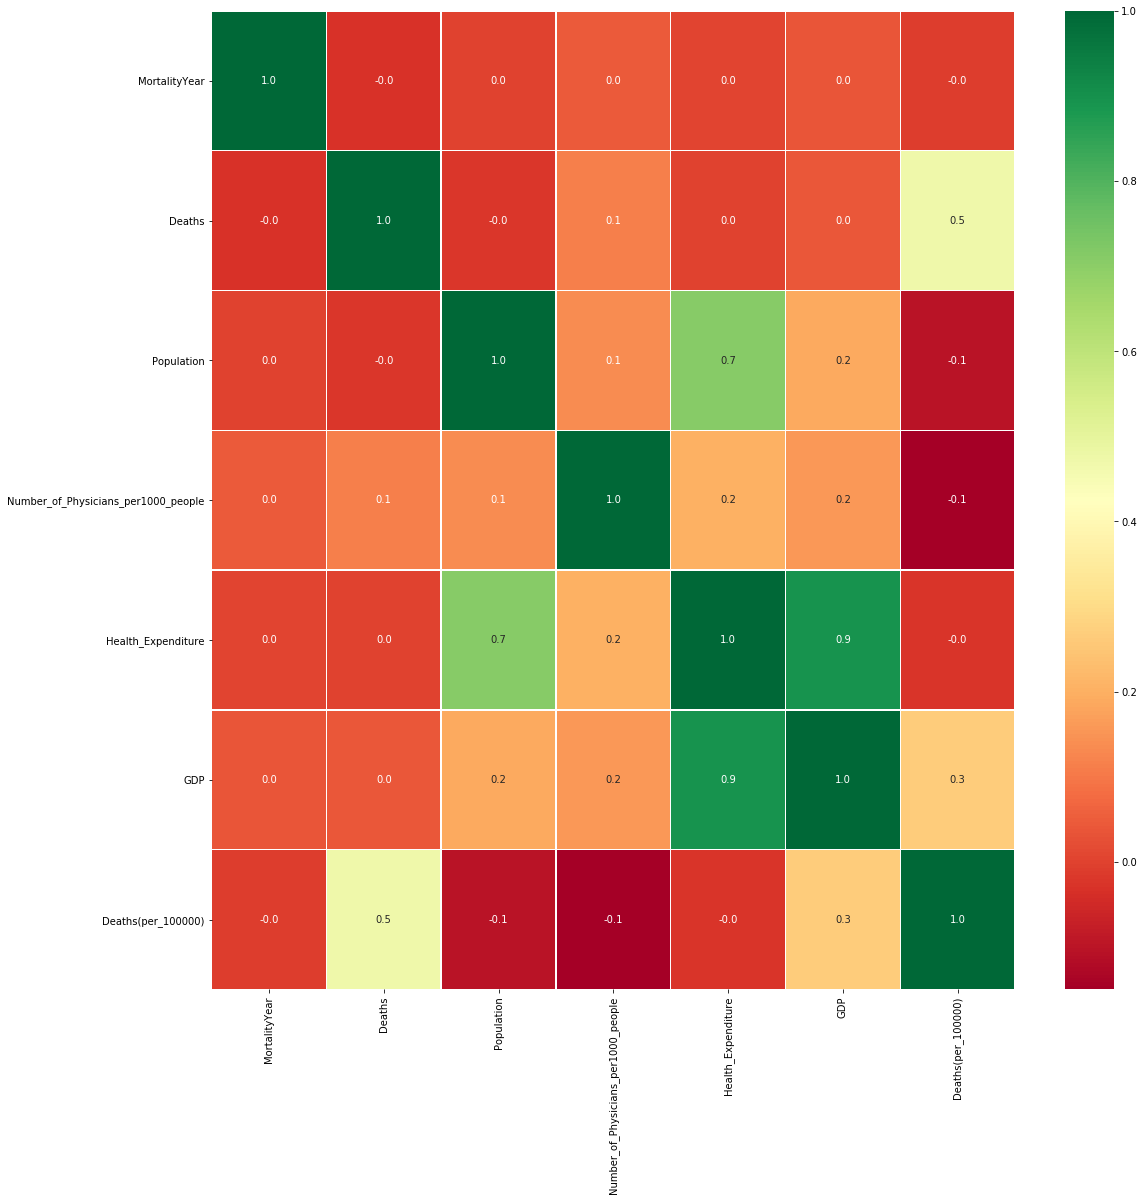

In [7]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(final_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap='RdYlGn')
plt.show()

In the heatmap we observe that there are a few redundant columns which we need not consider for calculating the correlation betweent the indicators Example, Mortality Year, Deaths etc. Hence we will drop these columns

In [8]:
drop_list = ['MortalityYear','Deaths']

In [9]:
heatmap_df = final_df.drop(drop_list, axis=1)

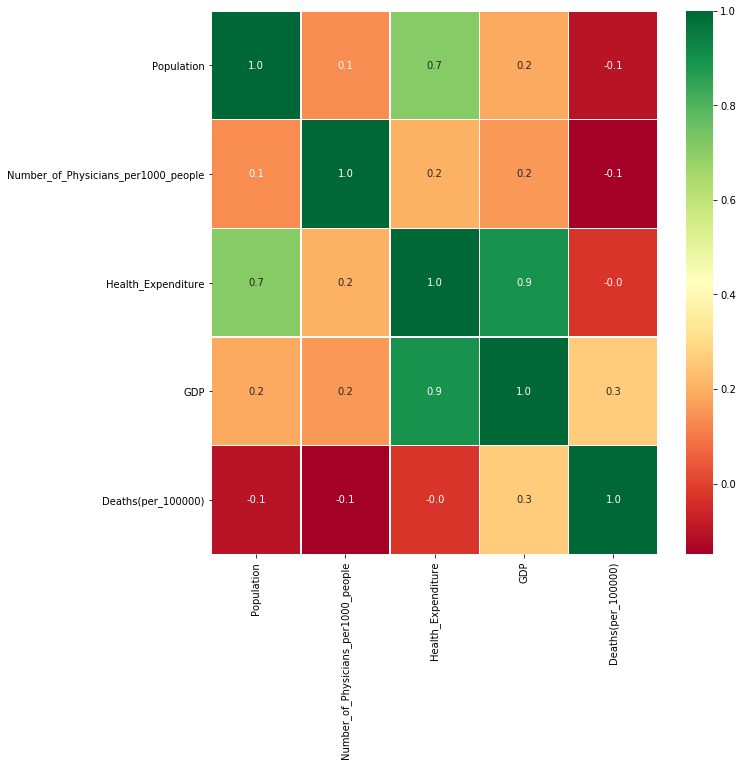

In [10]:
f1, ax1 = plt.subplots(figsize=(10,10))
sns.heatmap(heatmap_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax1, cmap='RdYlGn')
plt.show()

In the heatmap created above, we observe that Health_Expenditure and GDP have a correlation factor of 0.9, Health_Expenditure and Population have a correlation of 0.7. Hence we can possibly use Health Expenditure, GDP & Population as our predictors. 